# Exercises on root finding and optimization

Consider the following static problem:

$$
\max_{c>0,l\in(0,1)} \ln(c) + \frac{\phi}{\gamma} l^\gamma
$$
subject to
$$
c = l^\alpha + x,
$$
where $c$, $l$, and $x$ denote consumption, labor supply, and non-labor income. Consider that values of the parameters are given by:
- $\alpha=0.33$
- $\phi=1.0$
- $\gamma=2.0$
- $x = 0.1$

Solve the problem using the four methods we learned, as well as grid search.

In [10]:
# parameters
α = 0.33;
ϕ = 1.0;
γ = 2.0;
x = 0.1;

### Root finding
- Bisection
- Newton-Raphson

Note that the first order condition with respect to $l$ is given by:

$$
\frac{\alpha l^{\alpha-1}}{l^\alpha+x} = \phi l^{\gamma-1}
$$

Therefore, we need to find the root of the following function:
$$
f(l) = \frac{\alpha l^{\alpha-1}}{l^\alpha+x} - \phi l^{\gamma-1}
$$

In [11]:
# Define function f(l)
function f(l)

    y = (α*l^(α-1))/(l^α+x)-ϕ*l^(γ-1)

    return y
end

f (generic function with 1 method)

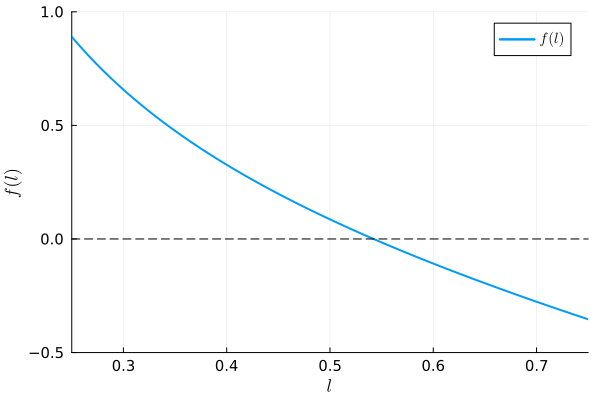

In [12]:
# visualization of the function f(l)
using Plots
using LaTeXStrings

nl = 1000;
l = collect(LinRange(0,1,nl))
fl = f.(l)

# plot

plot(l, fl;
     xlims=(0.25, 0.75),
     ylims=(-0.5, 1),
     label=L"f(l)",                 
     xlabel=L"l",                   
     ylabel=L"f(l)",                
     legend=:topright,
     linewidth=2,
     guidefont=font(12),
     tickfont=font(10),
     legendfont=font(10))
hline!([0], color=:black, linestyle=:dash, label="")

In [13]:
# Bisection

# Step 1: take two initial points.
ε = 1.e-10
lmax = 1.0-ε
lmin = 0.0+ε

# iteration
dif=1.0
tol=1.e-10
iter=1
maxiter=1000

while (dif>tol)

    # step 2: evaluate the function at the two points
    f_lmax = f(lmax)
    f_lmin = f(lmin)

    # compute the mid point and evaluate the function at that point
    lmid = (lmax+lmin)/2
    f_lmid = f(lmid)

    # Update. check if sign(f_lmax)=sign(f_lmid)
    if (f_lmax * f_lmid > 0) 
        lmax = lmid
    else
        lmin = lmid
    end

    dif = abs(lmax-lmin)

    if (iter<maxiter)
        iter+=1
    else
        println("Not converged.")
        println("dif=", dif)
    end
end

l_star = lmax # f_lmin is also fine
f_lstar = f(l_star)

using Printf
@printf("l_star = %.5f\n", l_star)
@printf("f_lstar = %.5f\n", f_lstar)
@printf("dif = %.5f\n", dif)
@printf("iter = %d\n", iter)   

### caveat: I didn't anything to deal with corner solution or the case that sign(f(0))=sign(f(1)) here.


l_star = 0.54223
f_lstar = -0.00000
dif = 0.00000
iter = 35


In [14]:
# Newton-Raphson method

# step 0: prepare function for first-order derivative
function f_prime(l)
    first_term  = (α*(α-1)*l^(α-2))/(l^α+x)
    second_term = -ϕ*(γ-1)*l^(γ-2)
    third_term  = -(α*l^(α-1))/((l^α+x)^2) * α*l^(α-1)

    y = first_term + second_term + third_term

    return y
end

# step 1: make an initial guess
x0 = 0.5

# step 2: construct sequences according to the formula until convergence
tol = 1.e-10
dif = 1.0
iter = 1
maxiter = 1000

while (dif>tol)
    x_next = x0 -f(x0)/f_prime(x0)

    dif = abs(x_next-x0)
    
    if (iter<maxiter)
        x0=x_next
        iter+=1
    else
        println("NOT CONVERGED")
    end
end

l_star = x0
f_star = f(x0)

@printf("l_star = %.5f\n", l_star)
@printf("f_lstar = %.5f\n", f_lstar)
@printf("dif = %.5f\n", dif)
@printf("iter = %d\n", iter)

## try different initial guess and see how it affects the number of iteration


l_star = 0.54223
f_lstar = -0.00000
dif = 0.00000
iter = 5


### Optimization
- Golden-section
- Newton's method

Note that the objective function can be written as a univariate function of $l, F(l)$:

$$
F(l) = \ln(l^\alpha+x) - \frac{\phi}{\gamma}l^\gamma
$$

In [15]:
# Define function F(l)
function F(l)

    y = log(l^α+x) -(ϕ/γ)*l^γ

    return y
end

F (generic function with 1 method)

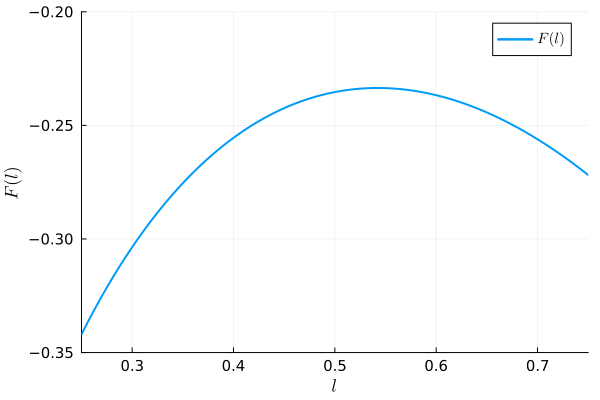

In [16]:
# visualization of the function F(l)
using Plots
using LaTeXStrings

nl = 1000;
l = collect(LinRange(0,1,nl))
Fl = F.(l)

# plot

plot(l, Fl;
     xlims=(0.25, 0.75),
     ylims=(-0.35, -0.2),
     label=L"F(l)",                 
     xlabel=L"l",                   
     ylabel=L"F(l)",                
     legend=:topright,
     linewidth=2,
     guidefont=font(12),
     tickfont=font(10),
     legendfont=font(10))

In [17]:
# Golden-section search

# step 1: find a,b,c where a<b<c and F(a)<F(c)<F(b)
nl=100
ε=1.e-10
minl = 0+ε
maxl = 1-ε

l = collect(LinRange(minl,maxl,nl))
Fl = F.(l)

arg_l = argmax(Fl)

a = l[1]
b = l[arg_l]
c = l[arg_l+1]

Fa = F(a)
Fc = F(c)
if (Fa>Fc)
    println("F(a)>F(c)")
    error("Need F(a) < F(c) < F(b) to start; got F(a) > F(c).")
end

ω=(3-sqrt(5))/2

# step 2: update bracket until convergence
dif=1.0
tol=1.e-8
iter=1
maxiter=1000

while (dif>tol)

    if ((b-a)>(c-b)) # if |a,b| > |b,c|
        d = b - ω*(b-a)
        d_is_left = true
    else
        d = b + ω*(c-b)
        d_is_left = false
    end

    Fd = F(d)
    Fb = F(b)

    if Fd > Fb
        # move the *far* endpoint toward d and shift b to d
        if d_is_left
            c = b
        else
            a = b
        end
        b = d
        Fb = Fd
    else
        # keep b; replace the endpoint on d's side with d
        if d_is_left
            a = d
        else
            c = d
        end
    end

    dif = abs(a-c)

    if (iter<maxiter)
        iter+=1
    else
        println("NOT CONVERGED")
    end

end

l_star = b

@printf("l_star = %.5f\n", l_star)
@printf("dif = %.5f\n", dif)
@printf("iter = %d\n", iter)

l_star = 0.54223
dif = 0.00000
iter = 36


In [18]:
# Newton's method

# step 1: make an initial guess
x0 = 0.5

# step 2: construct sequences according to the formula until convergence
tol = 1.e-10
dif = 1.0
iter = 1
maxiter = 1000

while (dif>tol)
    x_next = x0 -f(x0)/f_prime(x0)

    dif = abs(x_next-x0)
    
    if (iter<maxiter)
        x0=x_next
        iter+=1
    else
        println("NOT CONVERGED")
    end
end

l_star = x0

@printf("l_star = %.5f\n", l_star)
@printf("dif = %.5f\n", dif)
@printf("iter = %d\n", iter)

l_star = 0.54223
dif = 0.00000
iter = 5
